In [14]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000,784).astype('float32')/255.0
x_test=x_test.reshape(10000,784).astype('float32')/255.0
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
x_val=x_train[:12600]
x_train=x_train[12600:]
y_val=y_train[:12600]
y_train=y_train[12600:]
model=Sequential()
model.add(Dense(units=512, input_dim=28*28,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

In [15]:
hist=model.fit(x_train, y_train, epochs=5, batch_size=32,validation_data=(x_val, y_val))

Epoch 1/5
1482/1482 [==============================] - 4s 3ms/step - loss: 0.6776 - accuracy: 0.8363 - val_loss: 0.3794 - val_accuracy: 0.8991
Epoch 2/5
1482/1482 [==============================] - 4s 2ms/step - loss: 0.3477 - accuracy: 0.9039 - val_loss: 0.3065 - val_accuracy: 0.9159
Epoch 3/5
1482/1482 [==============================] - 4s 3ms/step - loss: 0.2962 - accuracy: 0.9170 - val_loss: 0.2740 - val_accuracy: 0.9244
Epoch 4/5
1482/1482 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9262 - val_loss: 0.2485 - val_accuracy: 0.9317
Epoch 5/5
1482/1482 [==============================] - 4s 3ms/step - loss: 0.2410 - accuracy: 0.9328 - val_loss: 0.2305 - val_accuracy: 0.9358


In [16]:
import numpy as np
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=32,verbose=0)
print('loss_and_metrics : '+str(loss_and_metrics))

model.save('c:/data/mnist')

loss_and_metrics : [0.21947963535785675, 0.9391000270843506]
INFO:tensorflow:Assets written to: c:/data/mnist\assets


No handles with labels found to put in legend.


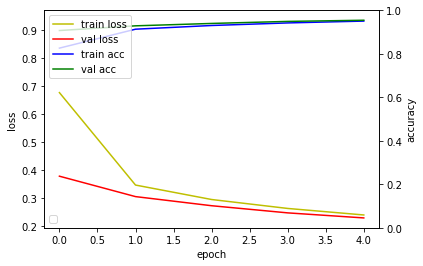

In [17]:
import matplotlib.pyplot as plt
fig,loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y', label='train loss')
loss_ax.plot(hist.history['val_loss'],'r', label='val loss')
loss_ax.plot(hist.history['accuracy'],'b', label='train acc')
loss_ax.plot(hist.history['val_accuracy'],'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [18]:
from tensorflow.keras.models import load_model
from numpy import argmax
xhat_idx=np.random.choice(x_test.shape[0],50)
xhat=x_test[xhat_idx]
model=load_model('c:/data/mnist')
yhat=model.predict(xhat)
for i in range(10):
    print('실제값:',argmax(y_test[xhat_idx[i]]),',예측값:',np.argmax(yhat[i]))

실제값: 4 ,예측값: 4
실제값: 0 ,예측값: 0
실제값: 1 ,예측값: 1
실제값: 4 ,예측값: 4
실제값: 0 ,예측값: 0
실제값: 8 ,예측값: 8
실제값: 5 ,예측값: 5
실제값: 0 ,예측값: 0
실제값: 2 ,예측값: 2
실제값: 1 ,예측값: 1
